Iterative paths and time series data representing the population of blowflies at time n.                                   
The population can vary periodically or in an erratic unpredictable manner.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (18,5)

In [6]:
def cobweb(f, r, x0, nmax=50, n_iter=100, n_skip=0):
    T,X_t=[],[]
    t,x=0,x0
    for i in range(n_iter + n_skip):
        if i >= n_skip:
            X_t.append(x)
            T.append(t)
            t+=1
        x = f(x,r)
    
    fig , (ax, ax1)= plt.subplots(1,2)
    ax1.plot(T, X_t,'-', T, X_t, 'ro')
    ax1.set_ylim(0, 1)
    ax1.set_xlim(0, T[-1])
    ax1.set_xlabel(r'$Time(t) \rightarrow $', fontsize=25)
    ax1.set_ylabel(r'$X_t \rightarrow $', fontsize=25)
    x = np.linspace(0, 1, 500)
    ax.plot(x, f(x, r), c='k', lw=2)
    ax.plot(x, x, c='r', lw=2)
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, 0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        py[n] = f(px[n-1], r)
        px[n+1] = py[n]
        py[n+1] = py[n]
    ax.plot(px, py, c='b', alpha=0.7)
    ax.minorticks_on()
    ax.grid(which='minor', alpha=0.5)
    ax.grid(which='major', alpha=0.5)
    ax.set_aspect('equal')
    ax.set_xlabel(r'$x  \rightarrow $', fontsize=25)
    ax.set_ylabel(r'$f(x) \rightarrow $', fontsize=25)
    plt.suptitle(r'$r$={},$x_0$={}'.format(r,x0), fontsize=25)
    return None

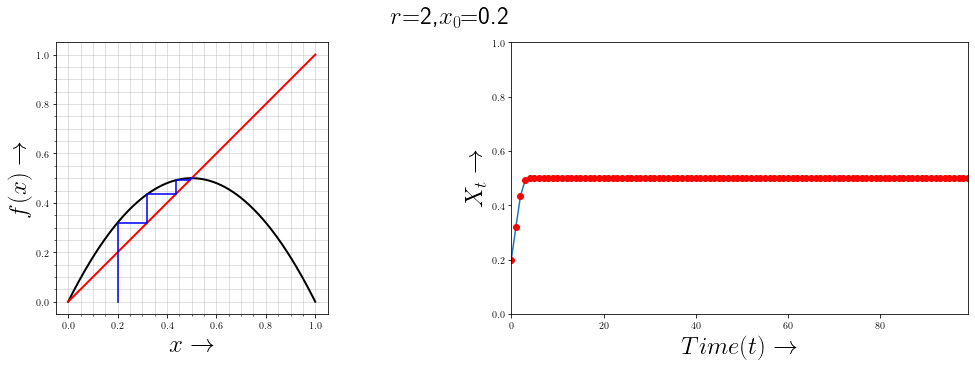

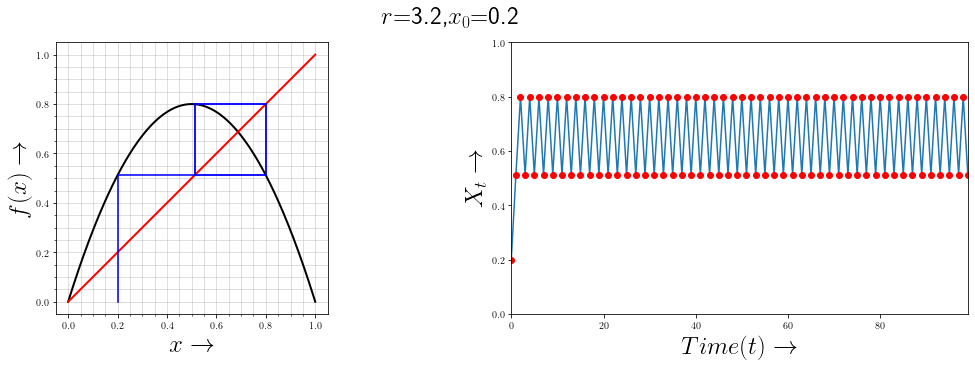

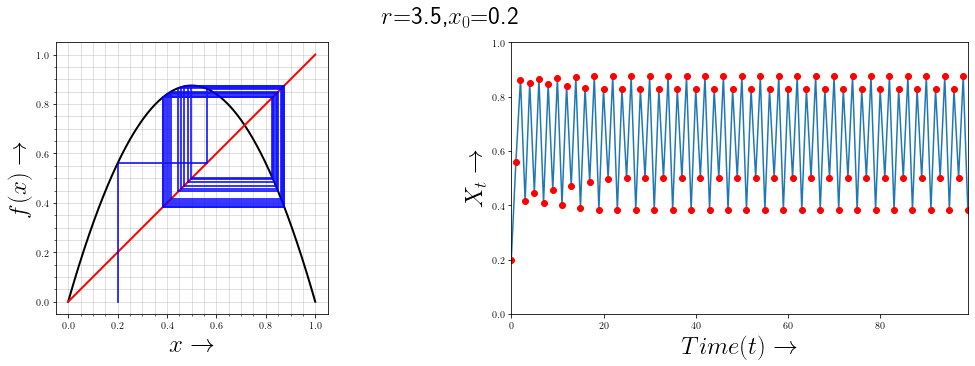

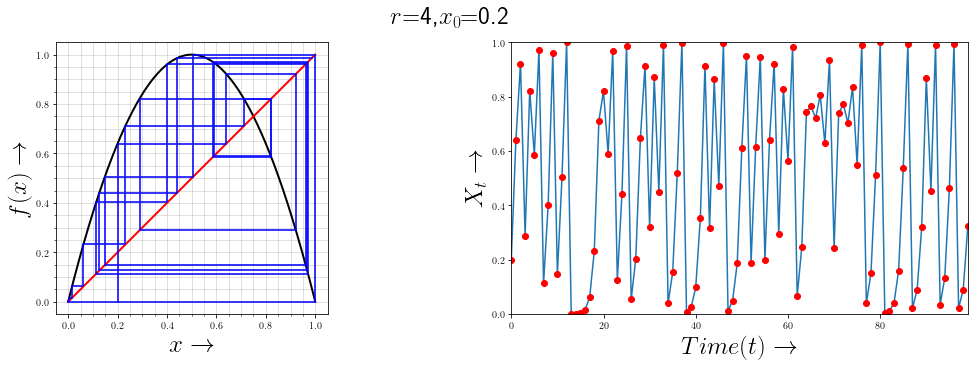

In [7]:
r = [2, 3.2, 3.5, 4]
x0= 0.2
for r in r:
    cobweb(lambda x,r: r*x*(1-x), r, x0)

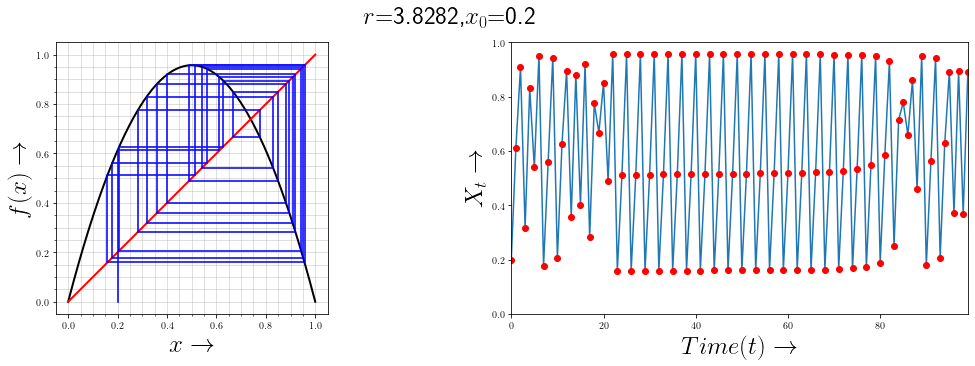

In [8]:
r=3.8282
cobweb(lambda x,r: r*x*(1-x), r, x0)